# 3.4.0 Putting it all together - Artisanal mining sites case study

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

import contextily

import geopandas as gpd 
from shapely.geometry import Point, Polygon

import mapclassify

import rasterio
import rasterio.plot
import rasterstats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [7]:
import sys
sys.path.append("../") 

from utils.paths import make_dir_line

modality = 'c'
project = 'Working with Geospatial Data in Python'
data = make_dir_line(modality, project)

raw = data('raw')
processed = data("processed")
external = data("external")

## 3.4.2 Import and explore the data

https://ipisresearch.be/home/maps-data/open-data/

https://www.wri.org

In [8]:
# Read the mining site data
mining_sites = gpd.read_file(raw/"ipis_cod_mines.geojson")
mining_sites.geometry = mining_sites.geometry.to_crs(epsg = 4326)

# Print the first rows and the CRS information
print(mining_sites.head())
print(mining_sites.crs)

   visit_date                                name  n_workers mineral   
0  2013-03-27                           Mayi-Tatu      150.0    Gold  \
1  2013-03-27                             Mabanga      115.0    Gold   
2  2013-03-27                             Molende      130.0    Gold   
3  2013-03-27                          Embouchure      135.0    Gold   
4  2013-03-27  Apumu-Atandele-Jerusalem-Luka Yayo      270.0    Gold   

                   geometry  
0  POINT (29.66033 1.01089)  
1  POINT (29.65862 1.00308)  
2  POINT (29.65629 0.98563)  
3  POINT (29.64494 0.99976)  
4  POINT (29.66000 0.95600)  
EPSG:4326


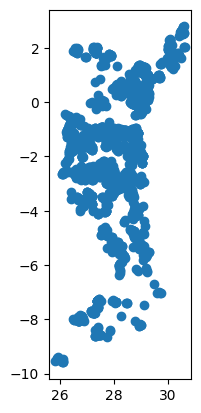

In [9]:
# Make a quick visualisation
mining_sites.plot()
plt.show()

In [10]:
# # Read the mining site data
# national_parks = geopandas.read_file("cod_conservation.shp")

# # Print the first rows and the CRS information
# print(national_parks.head())
# print(national_parks.crs)

# # Make a quick visualisation
# national_parks.plot()
# plt.show()

## 0.4.3 Convert to common CRS and save to a file

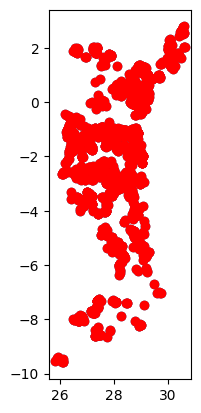

In [ ]:
# Plot the natural parks and mining site data
ax = mining_sites.plot()
mining_sites.plot(ax=ax, color='red')
plt.show()

In [ ]:
mining_sites_utm = mining_sites.to_crs(epsg=32735)

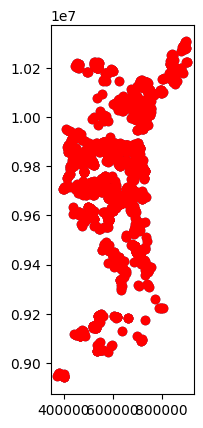

In [ ]:
# Plot the converted data again
ax = mining_sites_utm.plot()
mining_sites_utm.plot(ax=ax, color='red')
plt.show()

In [ ]:
# # Plot the natural parks and mining site data
# ax = national_parks.plot()
# mining_sites.plot(ax=ax, color='red')
# plt.show()

# mining_sites_utm = mining_sites.to_crs(epsg=32735)
# national_parks_utm = national_parks.to_crs(epsg=32735)

# # Plot the converted data again
# ax = national_parks_utm.plot()
# mining_sites_utm.plot(ax=ax, color='red')
# plt.show()

## 0.4.4 Convert to common CRS and save to a file

In [ ]:
# Write converted data to a file
mining_sites_utm.to_file(path.data_processed_dir("working/ipis_cod_mines_utm.gpkg"), driver='GPKG')

In [ ]:
# # Write converted data to a fil
# mining_sites_utm.to_file("ipis_cod_mines_utm.gpkg", driver='GPKG')
# national_parks_utm.to_file("cod_conservation_utm.shp", driver='ESRI Shapefile')

## 0.4.5 Styling a multi-layered plot

In [ ]:
# # Plot of the parks and mining sites
# ax = national_parks.plot(color='green')
# mining_sites.plot(ax=ax, column='mineral', markersize=5, alpha=0.5, legend=True)
# ax.set_axis_off()
# plt.show()

## 0.4.7 Buffer around a point

In [ ]:
goma = Point(29.2333, -1.6833)

In [ ]:
# Create a buffer of 50km around Goma
goma_buffer = goma.buffer(50000)

In [ ]:
# Check how many sites are located within the buffer
mask = mining_sites.within(goma_buffer)
print(mask.sum())

2143


In [ ]:
# # Calculate the area of national park within the buffer
# print(national_parks.intersection(goma_buffer).area.sum() / (1000**2))

## 0.4.8 Mining sites within national parks

In [ ]:
# # Extract the single polygon for the Kahuzi-Biega National park
# kahuzi = national_parks[national_parks['Name'] == "Kahuzi-Biega National park"].geometry.squeeze()

# # Take a subset of the mining sites located within Kahuzi
# sites_kahuzi = mining_sites[mining_sites.geometry.within(kahuzi)]
# print(sites_kahuzi)

# # Determine in which national park a mining site is located
# sites_within_park = geopandas.sjoin(mining_sites, national_parks, op='within', how='inner')
# print(sites_within_park.head())

# # The number of mining sites in each national park
# print(sites_within_park['Name'].value_counts())

## 0.4.10 Finding the name of the closest National Park

In [ ]:
# # Get the geometry of the first row
# single_mine = mining_sites.geometry[0]

# # Calculate the distance from each national park to this mine
# dist = national_parks.distance(single_mine)

# # The index of the minimal distance
# idx = dist.idxmin()

# # Access the name of the corresponding national park
# closest_park = national_parks.loc[idx, 'Name']
# print(closest_park)

## 0.4.11 Applying a custom operation to each geometry

In [ ]:
# # Define a function that returns the closest national park
# def closest_national_park(geom, national_parks):
#     dist = national_parks.distance(geom)
#     idx = dist.idxmin()
#     closest_park = national_parks.loc[idx, 'Name']
#     return closest_park

# # Call the function on the single mine
# print(closest_national_park(single_mine, national_parks))

# # Apply the function to all mining sites
# mining_sites['closest_park'] = mining_sites.geometry.apply(closest_national_park, national_parks=national_parks)
# print(mining_sites.head())

## 0.4.13 Import and plot raster data

https://www.wri.org

In [ ]:
# Open the raster dataset
src = rasterio.open(path.data_external_dir("working/central_africa_vegetation_map_foraf.tiff"))

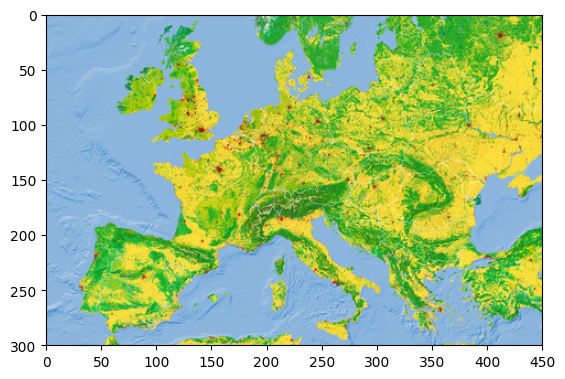

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the raster layer with the mining sites
ax = rasterio.plot.show(src)
mining_sites.plot(ax=ax, color='red', markersize=1)
plt.show()

## 0.4.14 Extract information from raster layer

In [ ]:
# # Import the rasterstats package
# import rasterstats

# # Extract the nearest value in the raster for all mining sites
# vegetation_raster = "central_africa_vegetation_map_foraf.tif"
# mining_sites['vegetation'] = rasterstats.point_query(mining_sites.geometry, vegetation_raster, interpolate='nearest')
# print(mining_sites.head())

# # Replace numeric vegation types codes with description
# mining_sites['vegetation'] = mining_sites['vegetation'].replace(vegetation_types)

# # Make a plot indicating the vegetation type
# mining_sites.plot(column='vegetation', legend=True)
# plt.show()

In [ ]:
vegetation_types = {0: 'TODO',
                    1: 'Dense moist forest',
                    2: 'Submontane forest',
                    3: 'Mountain forest',
                    4: 'Edaphic forest',
                    5: 'Mangrove',
                    6: 'Forest-savanna mosaic',
                    7: 'Rural complex and Young secondary forest ',
                    8: 'Closed to open deciduous woodland',
                    9: 'Savanna woodland - Tree savanna',
                    10: 'Shrubland ',
                    11: 'Grassland',
                    12: 'Aquatic grassland',
                    13: 'Swamp grassland',
                    14: 'Sparse vegetation',
                    15: 'Mosaic cultivated areas / vegetation (herbaceous or shrubs)',
                    16: 'Agriculture',
                    17: 'Irrigated agriculture',
                    18: 'Bare areas ',
                    19: 'Artificial Surfaces and Associated Areas ',
                    20: 'Water Bodies '}

In [ ]:
# Extract the nearest value in the raster for all mining sites
vegetation_raster = path.data_external_dir("working/central_africa_vegetation_map_foraf.tiff")

In [ ]:
mining_sites['vegetation'] = rasterstats.point_query(mining_sites.geometry, vegetation_raster, interpolate='nearest')
print(mining_sites.head())

   visit_date                                name  n_workers mineral  \
0  2013-03-27                           Mayi-Tatu      150.0    Gold   
1  2013-03-27                             Mabanga      115.0    Gold   
2  2013-03-27                             Molende      130.0    Gold   
3  2013-03-27                          Embouchure      135.0    Gold   
4  2013-03-27  Apumu-Atandele-Jerusalem-Luka Yayo      270.0    Gold   

                   geometry  vegetation  
0  POINT (29.66033 1.01089)       139.0  
1  POINT (29.65862 1.00308)       139.0  
2  POINT (29.65629 0.98563)       140.0  
3  POINT (29.64494 0.99976)       140.0  
4  POINT (29.66000 0.95600)       140.0  


In [ ]:
# Replace numeric vegation types codes with description
mining_sites['vegetation'] = mining_sites['vegetation'].replace(vegetation_types)

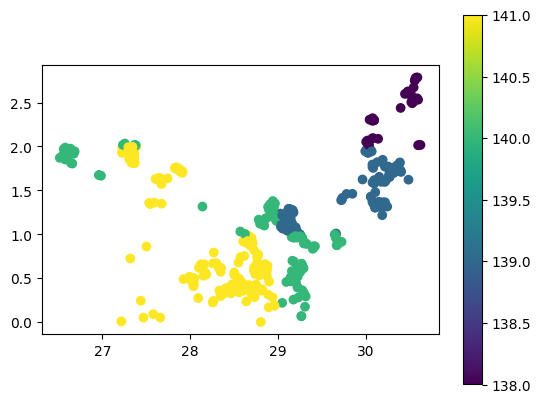

In [ ]:
# Make a plot indicating the vegetation type
mining_sites.plot(column='vegetation', legend=True)
plt.show()

In [ ]:
print('ok_')

ok_
